In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from itertools import product

In [2]:
# print all columns
pd.set_option('display.max_columns', None)
# color palette
colors = ['#ff0000', '#BB2F00', '#815700', '#4C7C00', '#09AA00']

In [3]:
# keys
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
# scores
DASS_scores = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
             'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
             'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}


In [5]:
df = pd.read_csv("/hpc/group/jilab/changxin/course/chengyu/IDS721/data.csv", sep='\t')
df.shape

(39775, 172)

In [6]:
df.head(5)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [7]:
# validity check
df['wrongansw'] = 0
df['wrongansw'] = df['wrongansw'].where(df['VCL6']== 0, df['wrongansw'] + 1)
df['wrongansw'] = df['wrongansw'].where(df['VCL9']== 0, df['wrongansw'] + 1)
df['wrongansw'] = df['wrongansw'].where(df['VCL12']== 0, df['wrongansw'] + 1)

df.wrongansw.value_counts()

0    34583
1     4044
2      822
3      326
Name: wrongansw, dtype: int64

In [8]:
df = df[df['wrongansw'].isin([2, 3])]
df = df.drop(columns='wrongansw')
df.head(3)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
26,4,1,4820,4,39,1109,4,8,1833,4,34,1518,4,38,899,4,33,1183,4,25,1699,3,28,2049,4,9,1984,3,24,2219,4,11,984,4,31,2248,4,21,1031,4,14,3974,4,17,1263,3,30,1552,4,3,2309,4,42,1007,3,2,4756,4,6,1300,3,29,1636,4,37,966,4,4,1757,4,40,2210,4,23,6485,4,32,1081,4,12,1228,4,20,1257,4,7,1365,4,5,3068,4,36,1226,4,19,1510,4,15,1465,4,22,867,4,10,2281,4,13,938,4,26,1736,3,27,1679,4,18,1316,4,16,1632,4,41,1099,4,35,1808,US,2,325,323,162,4,1,7,7,7,2,6,5,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,2,1,15,1,1,1,7,1,60,2,1,3,Acting
31,2,25,3671,2,26,5743,2,13,3154,1,21,5296,4,35,2418,2,11,4432,1,2,6342,1,22,2720,2,38,5144,2,19,2418,2,31,2240,2,17,3173,4,16,1630,2,42,5791,1,40,1963,2,29,4336,4,34,3174,1,5,4723,3,12,5930,2,10,2898,4,41,2181,1,3,4184,2,7,8400,3,4,3887,1,24,5405,4,23,2712,1,36,2246,1,39,2234,3,20,4778,1,8,6791,1,32,4564,1,18,6916,1,28,2306,4,1,8706,1,30,4911,1,6,2366,2,14,3348,4,33,3185,1,37,2041,3,15,4007,1,27,2361,4,9,4011,US,2,3,174,109,5,5,5,5,7,7,7,5,5,6,1,1,0,1,1,1,0,1,0,1,0,1,1,1,1,1,2,3,1,1,18,1,1,1,2,1,60,2,1,3,NaN
57,2,27,3827,3,33,6293,2,22,12153,3,3,27819,2,31,3677,3,37,5148,1,20,10609,2,24,5393,2,7,20696,3,5,18081,2,8,8125,3,39,5575,2,12,3849,3,35,8308,2,15,5444,2,19,4794,2,2,26488,2,41,3829,3,38,265,1,36,7074,1,40,3496,2,32,7458,3,14,5361,2,18,5991,2,16,7507,1,23,4278,3,13,3978,2,11,7440,2,4,6643,2,10,14317,2,6,7322,3,17,6827,2,30,2833,1,9,5161,3,42,8092,1,34,2065,2,21,6939,1,28,6312,2,25,70824,1,26,8159,3,1,41936,4,29,12401,GR,0,5,433,320,2,4,1,5,6,4,3,6,6,3,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1,3,3,2,2,21,2,1,1,1,1,60,1,1,2,art theory


In [9]:
df.shape

(1148, 172)

In [10]:
vcls = []
for i in range(1, 17):
    vcls.append('VCL' + str(i))
    
df = df.drop(columns=vcls)
df.shape

(1148, 156)

In [11]:
### keep questions related to depression 
fltr = []
for i in DASS_keys["Anxiety"]:
    fltr.append('Q' + str(i) + 'A')
    fltr.append('Q' + str(i) + 'I')
    fltr.append('Q' + str(i) + 'E')

for i in DASS_keys["Depression"]:
    fltr.append('Q' + str(i) + 'I')
    fltr.append('Q' + str(i) + 'E')

for i in DASS_keys["Stress"]:
    fltr.append('Q' + str(i) + 'A')
    fltr.append('Q' + str(i) + 'I')
    fltr.append('Q' + str(i) + 'E')

print(fltr)

# drop filters
df = df.drop(columns=fltr)
df.shape

['Q2A', 'Q2I', 'Q2E', 'Q4A', 'Q4I', 'Q4E', 'Q7A', 'Q7I', 'Q7E', 'Q9A', 'Q9I', 'Q9E', 'Q15A', 'Q15I', 'Q15E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q23A', 'Q23I', 'Q23E', 'Q25A', 'Q25I', 'Q25E', 'Q28A', 'Q28I', 'Q28E', 'Q30A', 'Q30I', 'Q30E', 'Q36A', 'Q36I', 'Q36E', 'Q40A', 'Q40I', 'Q40E', 'Q41A', 'Q41I', 'Q41E', 'Q3I', 'Q3E', 'Q5I', 'Q5E', 'Q10I', 'Q10E', 'Q13I', 'Q13E', 'Q16I', 'Q16E', 'Q17I', 'Q17E', 'Q21I', 'Q21E', 'Q24I', 'Q24E', 'Q26I', 'Q26E', 'Q31I', 'Q31E', 'Q34I', 'Q34E', 'Q37I', 'Q37E', 'Q38I', 'Q38E', 'Q42I', 'Q42E', 'Q1A', 'Q1I', 'Q1E', 'Q6A', 'Q6I', 'Q6E', 'Q8A', 'Q8I', 'Q8E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q14A', 'Q14I', 'Q14E', 'Q18A', 'Q18I', 'Q18E', 'Q22A', 'Q22I', 'Q22E', 'Q27A', 'Q27I', 'Q27E', 'Q29A', 'Q29I', 'Q29E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q35A', 'Q35I', 'Q35E', 'Q39A', 'Q39I', 'Q39E']


(1148, 44)

In [12]:
df.isnull().sum()
## drop major
df = df.drop(['major'], axis=1)

In [13]:
df.duplicated().sum()

0

In [14]:
numerical = df.select_dtypes('number').columns
print('Numerical Columns: ', df[numerical].columns)

Numerical Columns:  Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'source', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize',
       'uniquenetworklocation', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize'],
      dtype='object')


In [15]:
categorical = df.select_dtypes('object').columns
print('Categorical Columns: ', df[categorical].columns)
# n unique categories 
print(df[categorical].nunique())

Categorical Columns:  Index(['country'], dtype='object')
country    68
dtype: int64


In [16]:
# answers columns
depr = []
for i in DASS_keys["Depression"]:
    depr.append('Q' + str(i) + 'A')

# filter answers
df_depr = df.filter(depr)


In [17]:
# count scores
def score_count(df):
    cnt_num = [(df[df == i].sum(axis=1).sum()) / (i) for i in range(1, 5)]
    print(cnt_num)
    # plot size
    fig, ax = plt.subplots(figsize=(10,5))
    s=sb.barplot(x=[0, 1, 2, 3], y=cnt_num, ax=ax)
    s.set(title='Answers')
    s.set_xlabel('Score')
    s.set_ylabel('Count')
    s.set(xticklabels=['Not apply', 'Some degree', 'Considerable degree', 'Very much'])

[3656.0, 3812.0, 3306.0, 5298.0]


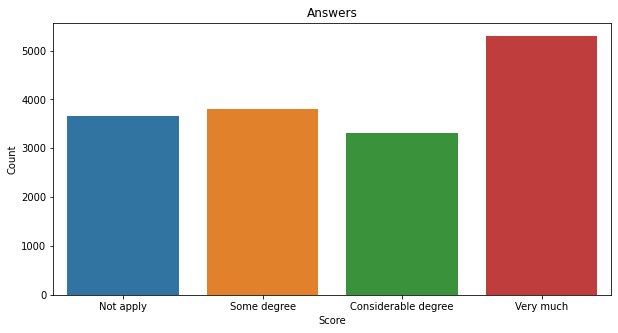

In [18]:
score_count(df_depr)

In [19]:
# Question indedx start from 0 
df[depr] -= 1 
df.head(5)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
26,3,3,2,3,2,3,2,3,3,3,3,3,2,3,US,2,325,323,162,4,1,7,7,7,2,6,5,1,1,1,1,2,1,15,1,1,1,7,1,60,2,1,3
31,1,3,1,3,1,3,3,2,3,0,3,1,3,3,US,2,3,174,109,5,5,5,5,7,7,7,5,5,6,2,3,1,1,18,1,1,1,2,1,60,2,1,3
57,1,1,2,1,1,1,0,1,0,1,0,1,0,3,GR,0,5,433,320,2,4,1,5,6,4,3,6,6,3,3,3,2,2,21,2,1,1,1,1,60,1,1,2
81,1,3,0,1,1,2,1,1,1,1,3,0,2,3,US,2,5,159,73,7,6,3,6,4,1,7,5,3,2,1,2,2,1,14,2,1,1,4,1,70,2,1,6
87,3,3,3,3,3,3,3,3,3,3,3,3,3,3,US,2,22,151,153,1,3,5,6,6,7,2,7,1,2,2,3,1,1,17,1,1,1,1,1,30,2,1,3


In [20]:
# calculate degree of depression
def scores(df):
    df["Scores"] = df[depr].sum(axis=1)
    return df
df = scores(df)

In [21]:
# Discretize scores 
def append(df, string):
    conditions = [
    ((df['Scores'] >= DASS_scores[string][0][0]) & (df['Scores'] < DASS_scores[string][0][1])),
    ((df['Scores'] >= DASS_scores[string][1][0]) & (df['Scores'] < DASS_scores[string][1][1])),
    ((df['Scores'] >= DASS_scores[string][2][0]) & (df['Scores'] < DASS_scores[string][2][1])),
    ((df['Scores'] >= DASS_scores[string][3][0]) & (df['Scores'] < DASS_scores[string][3][1])),
    (((df['Scores'] >= DASS_scores[string][3][1])))
    ]
    values = ['Normal','Mild', 'Moderate', 'Severe', 'Extremely Severe']
    df['Cat'] = np.select(conditions, values)
    return df
    
df = append(df, 'Depression')
df.head(3)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,Scores,Cat
26,3,3,2,3,2,3,2,3,3,3,3,3,2,3,US,2,325,323,162,4,1,7,7,7,2,6,5,1,1,1,1,2,1,15,1,1,1,7,1,60,2,1,3,38,Extremely Severe
31,1,3,1,3,1,3,3,2,3,0,3,1,3,3,US,2,3,174,109,5,5,5,5,7,7,7,5,5,6,2,3,1,1,18,1,1,1,2,1,60,2,1,3,30,Extremely Severe
57,1,1,2,1,1,1,0,1,0,1,0,1,0,3,GR,0,5,433,320,2,4,1,5,6,4,3,6,6,3,3,3,2,2,21,2,1,1,1,1,60,1,1,2,13,Mild


In [36]:
y = df['Cat']
X = df.drop(['Cat','Scores','screensize','uniquenetworklocation','country','introelapse','testelapse','surveyelapse','source'], axis=1)
X.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
26,3,3,2,3,2,3,2,3,3,3,3,3,2,3,4,1,7,7,7,2,6,5,1,1,1,1,2,1,15,1,7,1,60,2,1,3
31,1,3,1,3,1,3,3,2,3,0,3,1,3,3,5,5,5,5,7,7,7,5,5,6,2,3,1,1,18,1,2,1,60,2,1,3
57,1,1,2,1,1,1,0,1,0,1,0,1,0,3,2,4,1,5,6,4,3,6,6,3,3,3,2,2,21,1,1,1,60,1,1,2
81,1,3,0,1,1,2,1,1,1,1,3,0,2,3,7,6,3,6,4,1,7,5,3,2,1,2,2,1,14,1,4,1,70,2,1,6
87,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,5,6,6,7,2,7,1,2,2,3,1,1,17,1,1,1,30,2,1,3


In [37]:
X.shape

(1148, 36)

In [38]:
X.describe()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.00000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,1.388502,1.712544,1.564460,1.897213,1.641986,1.726481,1.499129,1.597561,1.770906,1.546167,1.712544,1.476481,1.529617,1.861498,3.768293,4.369338,4.989547,5.073171,5.146341,4.844948,5.128920,4.101045,3.581010,3.101916,2.277003,2.183798,1.723868,1.369338,23.558362,1.273519,5.88676,1.763937,45.174216,1.649826,1.212544,3.107143
std,1.116855,1.120911,1.195833,1.114176,1.163172,1.186275,1.218500,1.104036,1.081971,1.119126,1.184446,1.194424,1.229538,1.076409,2.079578,1.871504,1.840614,1.933474,1.755652,1.950656,1.840388,2.046597,1.968688,1.895039,0.944822,0.793510,0.504095,0.486434,10.261493,0.619443,3.96863,1.281968,23.897944,0.500418,0.516628,2.662311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.00000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,17.000000,1.000000,2.00000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.500000,2.000000,4.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,20.000000,1.000000,6.00000,1.000000,60.000000,2.000000,1.000000,3.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,5.000000,3.000000,3.000000,2.000000,2.000000,26.000000,1.000000,10.00000,2.000000,60.000000,2.000000,1.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,2.000000,74.000000,3.000000,12.00000,5.000000,70.000000,2.000000,3.000000,62.000000


In [25]:
y=y.map({'Normal':1,'Mild':2,'Moderate':3, 'Severe':4, 'Extremely Severe':5})

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 1.44351803  1.14908062  0.36437342 ...  0.70006802 -0.41158476
  -0.04026184]
 [-0.34800489  1.14908062 -0.47222795 ...  0.70006802 -0.41158476
  -0.04026184]
 [-0.34800489 -0.63595937  0.36437342 ... -1.29913119 -0.41158476
  -0.41603906]
 ...
 [-1.24376634 -1.52847936 -1.30882933 ... -1.29913119 -2.34805733
   1.46284701]
 [ 1.44351803  1.14908062  1.20097479 ... -1.29913119  3.46136038
  -0.04026184]
 [ 1.44351803  1.14908062  1.20097479 ...  0.70006802 -0.41158476
   0.71129258]]


In [ ]:
import pickle

## write model into model_pickle 
with open('scaler', 'wb') as f:
    pickle.dump(scaler, f)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [41]:
# hyperparameters
n_estimators = [20, 40, 80]
criterion = ['gini', 'entropy']
max_depth = [4, 8, 10]

# stratisfied k cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# create list of all combinations
param_all = list(product(n_estimators, criterion, max_depth))

# filter not allowed combinations
param_grid = [{'n_estimators' : [n_estimators], 'criterion': [criterion], 'max_depth' : [max_depth]} for n_estimators, criterion, max_depth in param_all]

# create model
model = RandomForestClassifier(random_state=1)

# define gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
# run gridsearch
grid_res = grid.fit(X_train, y_train)

# mean and deviation of each feature combination
means = grid_res.cv_results_['mean_test_score']
stds = grid_res.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_res.cv_results_['params']):
    print(f"{mean: .3f} (+/-{2 * std: .3f}) for {params}")

 0.808 (+/- 0.050) for {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 20}
 0.839 (+/- 0.054) for {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 20}
 0.839 (+/- 0.051) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
 0.805 (+/- 0.049) for {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 20}
 0.844 (+/- 0.063) for {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 20}
 0.840 (+/- 0.056) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
 0.817 (+/- 0.049) for {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}
 0.847 (+/- 0.047) for {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 40}
 0.851 (+/- 0.054) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 40}
 0.817 (+/- 0.047) for {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 40}
 0.850 (+/- 0.045) for {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 40}
 0.860 (+/- 0.040) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 40}
 0.820

In [42]:
print("Optimal")
print("Accuracy:", grid_res.best_score_)
print("Std:", grid_res.cv_results_['std_test_score'][grid_res.best_index_])
print("Hyperparams:", grid_res.best_params_)

Optimal
Accuracy: 0.8654499626587004
Std: 0.02012187571876371
Hyperparams: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [43]:
model = RandomForestClassifier(criterion=grid_res.best_params_['criterion'],
                               max_depth=grid_res.best_params_['max_depth'],
                               n_estimators=grid_res.best_params_['n_estimators'],
                               random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80,
                       random_state=1)

In [44]:
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8


In [45]:
y_test=model.predict(X_test)

In [46]:
y_test

array(['Normal', 'Extremely Severe', 'Moderate', 'Severe', 'Normal',
       'Moderate', 'Normal', 'Severe', 'Severe', 'Extremely Severe',
       'Extremely Severe', 'Extremely Severe', 'Normal', 'Moderate',
       'Extremely Severe', 'Extremely Severe', 'Normal',
       'Extremely Severe', 'Extremely Severe', 'Normal',
       'Extremely Severe', 'Moderate', 'Mild', 'Normal',
       'Extremely Severe', 'Moderate', 'Extremely Severe', 'Severe',
       'Moderate', 'Severe', 'Extremely Severe', 'Extremely Severe',
       'Extremely Severe', 'Extremely Severe', 'Normal', 'Normal',
       'Severe', 'Severe', 'Extremely Severe', 'Extremely Severe',
       'Normal', 'Severe', 'Moderate', 'Extremely Severe', 'Normal',
       'Moderate', 'Normal', 'Severe', 'Moderate', 'Extremely Severe',
       'Extremely Severe', 'Extremely Severe', 'Extremely Severe',
       'Normal', 'Extremely Severe', 'Extremely Severe', 'Moderate',
       'Moderate', 'Extremely Severe', 'Severe', 'Severe', 'Severe',
     

In [47]:
import pickle

## write model into model_pickle 
with open('model', 'wb') as f:
    pickle.dump(model, f)
